In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Датасет https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
path_to_datasets = "/content/drive/MyDrive/citec/datasets/olist"

orders = pd.read_csv(f"{path_to_datasets}/olist_order_items_dataset.csv")
purchases = pd.read_csv(f"{path_to_datasets}/olist_orders_dataset.csv", parse_dates=['order_purchase_timestamp'])
products = pd.read_csv(f"{path_to_datasets}/olist_products_dataset.csv")

In [ ]:
orders.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
purchases.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# Джоиним заказы, даты оплаты заказов и категории продуктов
dataset = orders[['order_id', 'product_id', 'price']].copy()\
    .merge(purchases[['order_id', 'order_purchase_timestamp']].copy(), how='left', on='order_id')\
    .merge(products[['product_id', 'product_category_name']].copy(), how='left', on='product_id')

In [ ]:
dataset.head()

,order_id,product_id,price,order_purchase_timestamp,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,2017-09-13 08:59:02,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,2017-04-26 10:53:06,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,2018-01-14 14:33:31,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,2018-08-08 10:00:35,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,2017-02-04 13:57:51,ferramentas_jardim


In [ ]:
# Приводим дату оплаты заказа к дате начала недели
dataset['week'] = dataset['order_purchase_timestamp'].dt.to_period('W').dt.start_time

In [ ]:
# Товары, по которым у нас наибольшее колво исторической инфы и колва заказов
dataset.groupby(['product_id']).count().reset_index(drop=False).sort_values('week', ascending=False).head(10)

,product_id,order_id,price,order_purchase_timestamp,product_category_name,week
22112,aca2eb7d00ea1a7b8ebd4e68314663af,527,527,527,527,527
19742,99a4788cb24856965c36a24e339b6058,488,488,488,488,488
8613,422879e10f46682990de24d770e7f83d,484,484,484,484,484
7364,389d119b48cf3043d311335e499d9c6b,392,392,392,392,392
7079,368c6c730842d78016ad823897a372db,388,388,388,388,388
10840,53759a2ecddad2bb87a079a1f1519f73,373,373,373,373,373
27039,d1c427060a0f73f6b889a5c7c61f2ac4,343,343,343,343,343
10867,53b36df67ebb7c41585e8d54d6772e08,323,323,323,323,323
2794,154e7e31ebfa092203795c972e5804a6,281,281,281,281,281
8051,3dd2a17168ec895c781a9191c1e95ad7,274,274,274,274,274


In [ ]:
# Рассмотрим конкретный товар d1c427060a0f73f6b889a5c7c61f2ac4 aca2eb7d00ea1a7b8ebd4e68314663af 99a4788cb24856965c36a24e339b6058
df = dataset[dataset['product_id'] == 'd1c427060a0f73f6b889a5c7c61f2ac4']\
.groupby(['week']).agg(
    sum_price=('price', 'sum'),
    mean_price=('price', 'mean'),
    count_orders=('price', 'count')
).reset_index(drop=False)

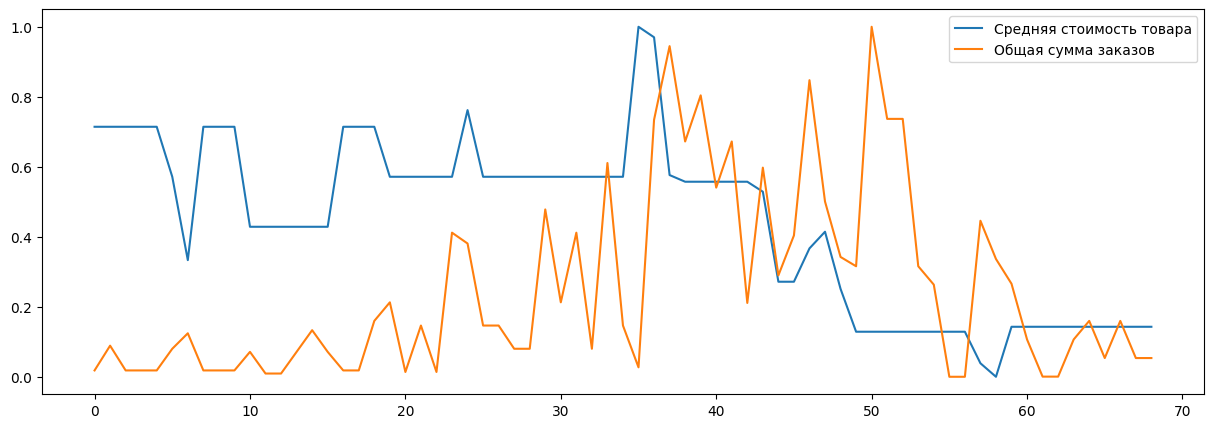

In [ ]:
# Целевая метрика - общая сумма заказов, ее нужно максимально повысить
# Пускай средняя стоимость товара за неделю по всем заказам есть "устанавливаемая нами стоимость товара"
plt.figure(figsize=(15, 5))
plt.plot((df['mean_price'] - df['mean_price'].min()) / (df['mean_price'].max() - df['mean_price'].min()), label='Средняя стоимость товара')
plt.plot((df['sum_price'] - df['sum_price'].min()) / (df['sum_price'].max() - df['sum_price'].min()), label='Общая сумма заказов')
plt.legend()

In [ ]:
# Билдим датасет по историчности продаж товаров
data = dataset.groupby(['product_id', 'week']).agg(
    sum_price=('price', 'sum'),
    mean_price=('price', 'mean'),
    count_orders=('price', 'count')
).reset_index(drop=False)

In [ ]:
data[data['product_id'] == '99a4788cb24856965c36a24e339b6058']

,product_id,week,sum_price,mean_price,count_orders
47433,99a4788cb24856965c36a24e339b6058,2017-02-27,629.3,89.9,7
47434,99a4788cb24856965c36a24e339b6058,2017-03-06,449.5,89.9,5
47435,99a4788cb24856965c36a24e339b6058,2017-03-13,359.6,89.9,4
47436,99a4788cb24856965c36a24e339b6058,2017-03-20,359.6,89.9,4
47437,99a4788cb24856965c36a24e339b6058,2017-03-27,539.4,89.9,6
...,...,...,...,...,...
47502,99a4788cb24856965c36a24e339b6058,2018-07-02,559.3,79.9,7
47503,99a4788cb24856965c36a24e339b6058,2018-07-23,148.0,74.0,2
47504,99a4788cb24856965c36a24e339b6058,2018-07-30,148.0,74.0,2
47505,99a4788cb24856965c36a24e339b6058,2018-08-06,74.0,74.0,1


In [6]:
import json

In [7]:
with open('/content/example_json.json', encoding='utf-8') as fin:
    ozonPrice, usualPrice = "", ""
    d = json.load(fin)
    dd = d["widgetStates"]
    for key in dd:
        if key.startswith('price-'):
            ddd = json.loads(dd[key])
            ozonPrice = ddd["ozonCardPrice"]["accentPrice"]["price"]["price"]["price"]["text"].split(" ₽")[0]
            usualPrice = ddd["ozonCardPrice"]["price"]["price"]["price"]["text"].split(" ₽")[0]
    print(ozonPrice, usualPrice)

803 ₽ 836 ₽
